<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula2a_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [2]:
X, y = data['data'], data['target']
X.shape, y.shape

((442, 10), (442,))

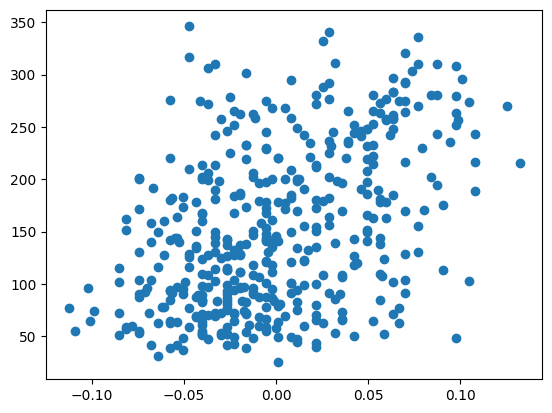

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,3], y)
plt.show()

In [4]:
X2 = X[:,2:3]

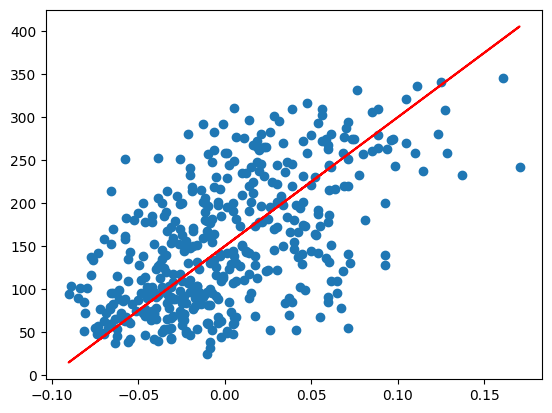

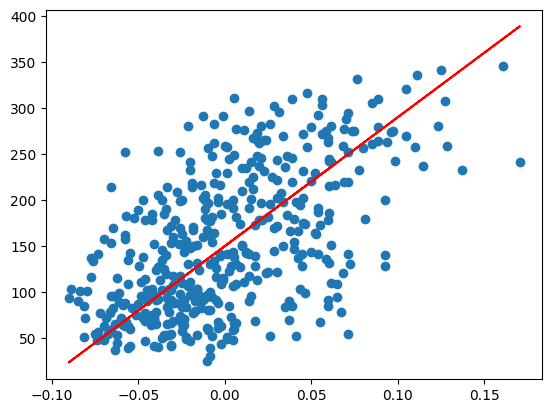

In [5]:
def modelo_linear(X, w, b):
    y = w*X + b
    return y
ypred = modelo_linear(X2, 1500, 150)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()
ypred = modelo_linear(X2, 1400, 150)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

In [6]:
# mean absolute error
def mae(y, ypred):
    ydif =  y.reshape(-1,1) - ypred
    yabs = abs(ydif)
    mae = yabs.mean()
    return mae

mae(y, modelo_linear(X2, 1500, 150)), mae(y, modelo_linear(X2, 1400, 150))

(53.93453917420422, 52.694626099275105)

In [7]:
# mean squared error
def mse(y, ypred):
    ydif =  y.reshape(-1,1) - ypred
    ysquared = ydif**2
    mse = ysquared.mean()
    return mse

mse(y, modelo_linear(X2, 1500, 150)), mse(y, modelo_linear(X2, 1400, 150))

(4580.803662551777, 4354.303780372608)

In [8]:
from math import sqrt
# root mean squared error
def rmse(y, ypred):
    ydif =  y.reshape(-1,1) - ypred
    ysquared = ydif**2
    mse = ysquared.mean()
    rmse = sqrt(mse)
    return rmse

rmse(y, modelo_linear(X2, 1500, 150)), rmse(y, modelo_linear(X2, 1400, 150))

(67.68163460313127, 65.98714860010703)

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, modelo_linear(X2, 1500, 150)), mean_squared_error(y, modelo_linear(X2, 1400, 150))

(4580.803662551777, 4354.303780372608)

In [10]:
mean_squared_error(y, modelo_linear(X2, 0, 0))

29074.481900452487

In [23]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2,3]])
A * B

array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [25]:
A @ B.T

array([[14],
       [32]])

27035.053589003448
[[949.43525862]]


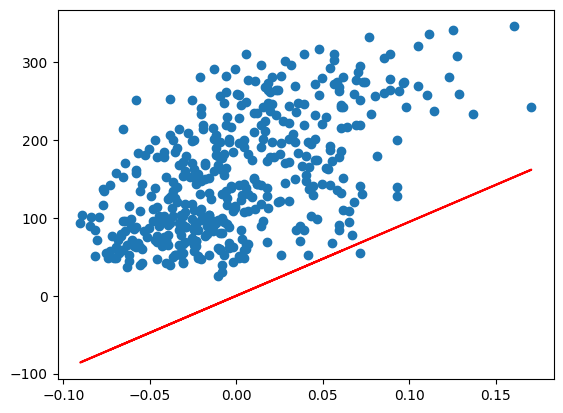

In [46]:
import numpy as np

class regressao_linear():
  def fit(self, X, y):
    self.w = np.random.uniform(size=(1, 1))
    for _ in range(2000):
      ypred = X @ self.w
      erros = ypred - y.reshape(-1, 1)
      ajuste = X.T @ erros
      self.w = self.w - ajuste * 0.01
      # print(self.w, mean_squared_error(y, ypred))

  def predict(self, X):
    y = self.w*X #+ self.b
    return y

modelo = regressao_linear()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(mean_squared_error(y, ypred))
print(modelo.w)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

3890.548618048906
[[152.13348416]
 [943.05729803]]


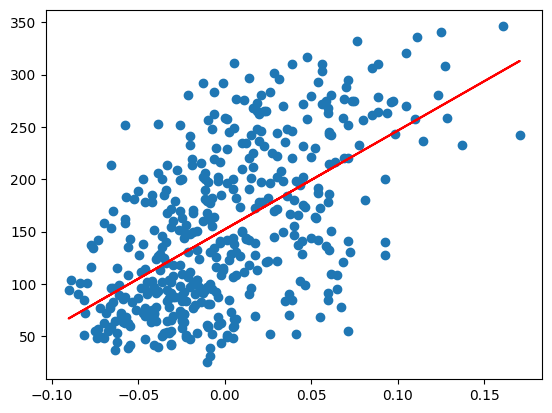

In [53]:
import numpy as np

def addBias(X):
  bias = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class regressao_linear():
  def fit(self, X, y):
    X = addBias(X)
    self.w = np.random.uniform(size=(X.shape[1], 1))
    for _ in range(5000):
      ypred = X @ self.w
      erros = ypred - y.reshape(-1,1)
      ajuste = X.T @ erros
      self.w = self.w - ajuste * 0.001
      # print(self.w, mean_squared_error(y, ypred))

  def predict(self, X):
    X = addBias(X)
    ypred = X @ self.w
    return ypred

modelo = regressao_linear()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(mean_squared_error(y, ypred))
print(modelo.w)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

2880.9712215668123
[[ 152.13348416]
 [  -5.88611398]
 [-235.27655043]
 [ 526.25399554]
 [ 320.65097357]
 [ -64.07673431]
 [-115.13756534]
 [-206.37521183]
 [ 118.17679569]
 [ 459.76359146]
 [  81.47699105]]


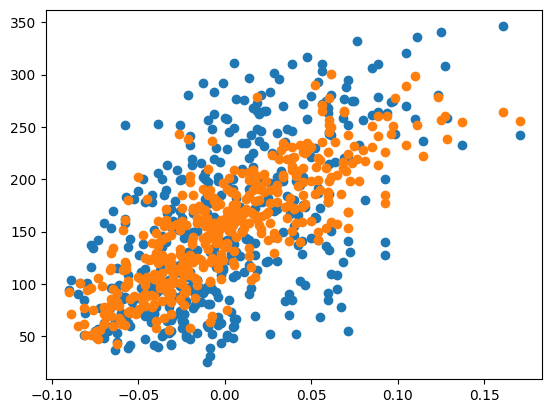

In [60]:
modelo = regressao_linear()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.w)
plt.scatter(X2, y)
plt.scatter(X2, ypred)
plt.show()

2859.69634758675
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218] 152.13348416289597


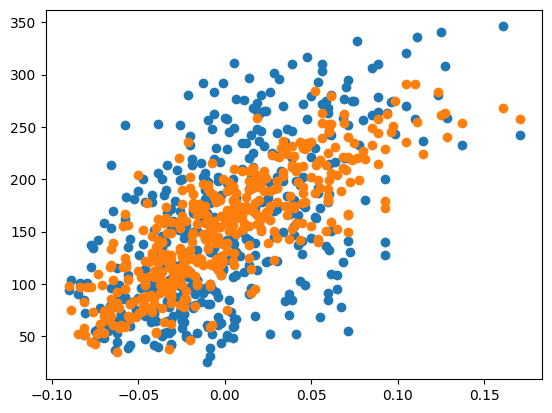

In [63]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.coef_, modelo.intercept_)
plt.scatter(X2, y)
plt.scatter(X2, ypred)
plt.show()

In [64]:
bias = 152.13348416289597

In [71]:
valores = np.linspace(0, 2*bias, 99)
valores

array([  0.        ,   3.10476498,   6.20952997,   9.31429495,
        12.41905993,  15.52382491,  18.6285899 ,  21.73335488,
        24.83811986,  27.94288485,  31.04764983,  34.15241481,
        37.25717979,  40.36194478,  43.46670976,  46.57147474,
        49.67623973,  52.78100471,  55.88576969,  58.99053468,
        62.09529966,  65.20006464,  68.30482962,  71.40959461,
        74.51435959,  77.61912457,  80.72388956,  83.82865454,
        86.93341952,  90.0381845 ,  93.14294949,  96.24771447,
        99.35247945, 102.45724444, 105.56200942, 108.6667744 ,
       111.77153938, 114.87630437, 117.98106935, 121.08583433,
       124.19059932, 127.2953643 , 130.40012928, 133.50489427,
       136.60965925, 139.71442423, 142.81918921, 145.9239542 ,
       149.02871918, 152.13348416, 155.23824915, 158.34301413,
       161.44777911, 164.55254409, 167.65730908, 170.76207406,
       173.86683904, 176.97160403, 180.07636901, 183.18113399,
       186.28589897, 189.39066396, 192.49542894, 195.60

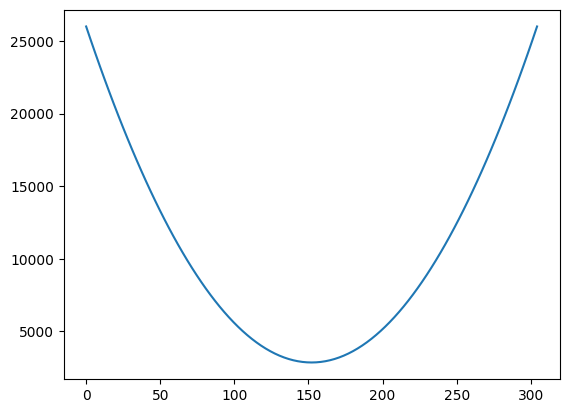

In [74]:
mses = []
for valor in valores:
  modelo.intercept_ = valor
  ypred = modelo.predict(X)
  mses.append(mean_squared_error(y, ypred))
plt.plot(valores, mses)
plt.show()

In [87]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
Xtr.shape, Xte.shape, ytr.shape, yte.shape

((309, 10), (133, 10), (309,), (133,))

In [88]:
modelo = LinearRegression()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
mean_squared_error(yte, ypred)

2873.324762553681

In [109]:
from sklearn.model_selection import RepeatedKFold

mses = []
splitter = RepeatedKFold()
for idx_tr, idx_te in splitter.split(X, y):
  modelo.fit(X[idx_tr], y[idx_tr])
  ypred = modelo.predict(X[idx_te])
  mses.append(mean_squared_error(y[idx_te], ypred))
np.mean(mses)

3014.9645577237766

In [131]:
from sklearn.model_selection import cross_validate

scores = cross_validate(modelo, X, y, scoring='neg_mean_squared_error', cv=splitter)
print(np.mean(scores['test_score']))

-3008.9594677689192


In [132]:
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor()
scores = cross_validate(rfmodel, X, y, scoring='neg_mean_squared_error', cv=splitter)
print(np.mean(scores['test_score']))

-3391.668505283964


In [133]:
rfmodel.fit(X, y)
rfmodel.feature_importances_

array([0.05923191, 0.01208456, 0.26905132, 0.0960427 , 0.04552373,
       0.05412039, 0.05137931, 0.02287146, 0.32270179, 0.06699283])

In [142]:
scores = cross_validate(rfmodel, X[:,-2:-1], y, scoring='neg_mean_squared_error', cv=splitter)
print(np.mean(scores['test_score']))
scores = cross_validate(rfmodel, X[:,1:2], y, scoring='neg_mean_squared_error', cv=splitter)
print(np.mean(scores['test_score']))

-5759.368486508639
-5987.374369104103


In [137]:
modelo.fit(X, y)
modelo.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
modelo.fit(scaler.transform(X), y)
modelo.coef_

array([ -0.47612079, -11.40686692,  24.72654886,  15.42940413,
       -37.67995261,  22.67616277,   4.80613814,   8.42203936,
        35.73444577,   3.21667372])

In [140]:
scores = cross_validate(modelo, X[:,-2:-1], y, scoring='neg_mean_squared_error', cv=splitter)
print(np.mean(scores['test_score']))

-4071.8536456943634


In [141]:
scores = cross_validate(modelo, X[:,0:1], y, scoring='neg_mean_squared_error', cv=splitter)
print(np.mean(scores['test_score']))

-5772.544179626333
